# Exercise 4.10

# Contents
 ## Import libraries and data
 ## Create Region column
 ## Analyze spending in each region
 ## Create table without low-activity customers
 ## Analyze Customer Ordering Behavior
   ### Create a customer shopping behavior flag based on order timing
   ### Find statistics for shopping behavior based on order number
   ### Find statistics for shopping behavior based on expenditure
   ### Analyze customer shopping behavior by department
   ### Analyze customer shopping behavior by region
 ## Analyze Customer Lifestyle
   ### Create a customer lifestyle flag based on income and marital status
   ### Find statistics for lifestyle based on order number
   ### Find statistics for lifestyle based on expenditure
   ### Analyze customer shopping behavior by region
 ## Export tables and plots

## Import libraries and data

In [3]:
# import analysis libraries
import pandas as pd
import numpy as np
import os

In [4]:
# import ord_prod_cust data set
ord_prod_full = pd.read_pickle(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\Data\Prepared Data\ord_prod_custC.pkl')

In [5]:
# check table column names
ord_prod_full.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'Busiest_Days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_mean',
       'spending_flag', 'frequency_median', 'frequency_flag', 'First Name',
       'Last Name', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', '_merge'],
      dtype='object')

In [5]:
# remove the first and last name columns for security reasons
ord_prod_full.drop(['First Name', 'Last Name'], axis=1, inplace = True)

In [7]:
# check that the columns were removed
ord_prod_full.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'Busiest_Days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_mean',
       'spending_flag', 'frequency_median', 'frequency_flag', 'Gender',
       'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       '_merge'],
      dtype='object')

## Create Region column

In [6]:
# create lists of states per region
Northeast_states = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [7]:
Midwest_states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [8]:
South_states = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [9]:
West_states = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [10]:
# set the region for each state in the table
ord_prod_full.loc[ord_prod_full['STATE'].isin(Northeast_states), 'Region'] = 'Northeast'

In [11]:
ord_prod_full.loc[ord_prod_full['STATE'].isin(Midwest_states), 'Region'] = 'Midwest'

In [12]:
ord_prod_full.loc[ord_prod_full['STATE'].isin(South_states), 'Region'] = 'South'

In [13]:
ord_prod_full.loc[ord_prod_full['STATE'].isin(West_states), 'Region'] = 'West'

In [14]:
# find value counts for each region to check for assignment completion
ord_prod_full['Region'].value_counts(dropna = False)

Region
South        10801982
West          8300617
Midwest       7604016
Northeast     5728444
Name: count, dtype: int64

## Analyze spending in each region

In [17]:
# create table for region and spending flag
region_spending = pd.crosstab(ord_prod_full['Region'], ord_prod_full['spending_flag'], dropna = False)

In [18]:
# view table
region_spending

spending_flag,High Spender,Low Spender
Region,,
Midwest,156084,7447932
Northeast,108276,5620168
South,209878,10592104
West,160440,8140177


## Create table without low-activity customers

In [19]:
# create low-activity flag
ord_prod_full.loc[ord_prod_full['order_number'] < 5, 'low_spender'] = 'yes'

In [20]:
ord_prod_full.loc[ord_prod_full['order_number'] >= 5, 'low_spender'] = 'no'

In [21]:
# create table including only mid to high_activity customers
mid_high_spender = ord_prod_full[ord_prod_full['low_spender'] == 'no']

In [22]:
# compare shapes of original and new table
ord_prod_full.shape

(32435059, 32)

In [23]:
mid_high_spender.shape

(24437464, 32)

In [24]:
# check that new table has no missing values
ord_prod_full['low_spender'].value_counts(dropna = False)

low_spender
no     24437464
yes     7997595
Name: count, dtype: int64

In [ ]:
# Save mid to high_activity able 
mid_high_spender.to_pickle(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\Data\Prepared Data\mid_high_spender.pkl')

## Analyze Customer Ordering Behavior

### Create a customer shopping behavior flag based on order timing

In [15]:
# set the default flag to regular
ord_prod_full['shopping_behavior'] = 'Regular'

In [16]:
# set the flag to early bird for orders between 5a and 8a
ord_prod_full.loc[ord_prod_full['order_hour'].between(5, 8), 'shopping_behavior'] = 'early bird'

In [17]:
# set the flag to night owl for orders after 8p and before 5a
ord_prod_full.loc[(ord_prod_full['order_hour'] >= 21) | (ord_prod_full['order_hour'] < 5), 'shopping_behavior'] = 'night owl'

In [18]:
# check for assignment completion
ord_prod_full['shopping_behavior'].value_counts(dropna = False)

shopping_behavior
Regular       27101736
early bird     2990802
night owl      2342521
Name: count, dtype: int64

In [31]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

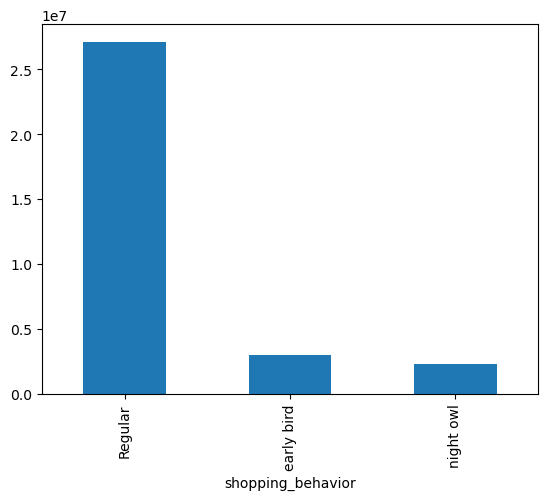

In [32]:
# create bar graph for shopping behavior
shopping_behavior_bar = ord_prod_full['shopping_behavior'].value_counts().plot.bar()

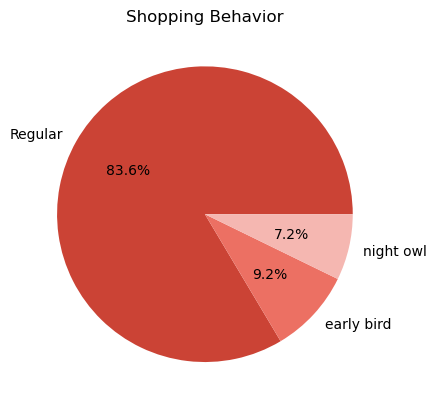

In [110]:
# create pie chart for shopping behavior
#create table of shopping behavior counts
behavior_counts = ord_prod_full['shopping_behavior'].value_counts()
# create pie chart with labels, color
behavior_pie = plt.pie(behavior_counts,labels = behavior_counts.index, autopct='%1.1f%%', colors=['#CB4335', '#EC7063', '#F5B7B1'])
# add title
plt.title('Shopping Behavior')
# save pie chart
plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\behavior_pie.png')


### Find statistics for shopping behavior based on order number

In [19]:
# find min, max, and mean order numbers for each behavior
behavior_order_stats = ord_prod_full.groupby('shopping_behavior')['order_number'].agg(['min', 'max', 'mean'])

In [20]:
# view stats
behavior_order_stats

,min,max,mean
shopping_behavior,,,
Regular,1,99,16.931966
early bird,1,99,19.338724
night owl,1,99,16.766575


### Find statistics for shopping behavior based on expenditure

In [21]:
# find the expenditure for each order for each customer
behavior_order_total = ord_prod_full.groupby(['shopping_behavior', 'user_id', 'order_number'])['prices'].sum().reset_index()

In [22]:
# view order expenditure stats
behavior_order_total

,shopping_behavior,user_id,order_number,prices
0,Regular,1,3,28.2
1,Regular,1,5,57.0
2,Regular,1,7,29.0
3,Regular,1,8,40.2
4,Regular,1,9,40.2
...,...,...,...,...
3214869,night owl,206207,12,42.8
3214870,night owl,206208,18,38.7
3214871,night owl,206208,35,124.9
3214872,night owl,206208,47,149.4


In [23]:
# find the expenditure statistics for each customer 
behavior_shopper_total = behavior_order_total.groupby(['shopping_behavior', 'user_id'])['prices'].agg(['min', 'max', 'mean']).reset_index()

In [24]:
# view the expenditure statistics for each customer
behavior_shopper_total

,shopping_behavior,user_id,min,max,mean
0,Regular,1,28.2,57.0,38.920000
1,Regular,2,19.0,213.1,104.685714
2,Regular,3,30.7,107.2,60.116667
3,Regular,4,10.8,63.4,29.540000
4,Regular,5,43.6,118.4,85.000000
...,...,...,...,...,...
380631,night owl,206200,59.1,243.4,117.066667
380632,night owl,206201,54.7,110.6,82.650000
380633,night owl,206202,19.1,122.6,70.287500
380634,night owl,206207,42.8,50.8,46.800000


In [104]:
# find the expenditure statistics for each behavior flag
behavior_price_stats = behavior_shopper_total.groupby('shopping_behavior').agg({'min':'min', 'max':'max', 'mean':'mean'}).reset_index()

In [105]:
# view expenditure statistics for each behavior flag
behavior_price_stats

,shopping_behavior,min,max,mean
0,Regular,0.0,1092.2,77.284687
1,early bird,0.0,721.0,78.396620
2,night owl,0.0,875.0,82.121470


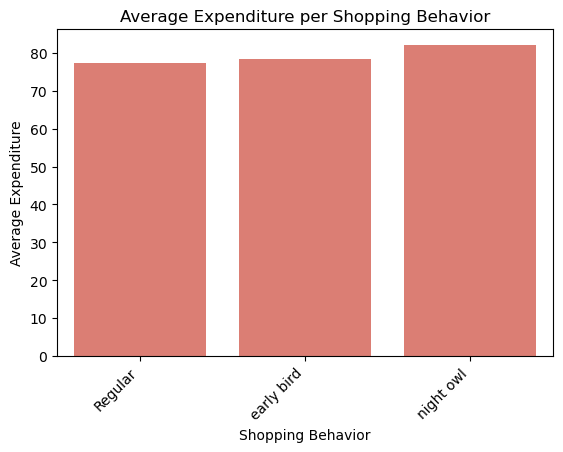

In [111]:
# create bar chart for average order expense per shopping behavior

# create table with average order expense 
behavior_price_bar = sns.barplot(x = 'shopping_behavior', y = 'mean', data = behavior_price_stats, color = '#EC7063')

# adjust plot size
plt.subplots_adjust(bottom=0.2)

# add axis and title labels
plt.xlabel('Shopping Behavior')
plt.ylabel('Average Expenditure')
plt.title('Average Expenditure per Shopping Behavior')

# add x tick labels, position adjusted
plt.xticks(rotation = 45, ha = 'right')

# save figure
plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\behavior_price_bar.png')


### Analyze customer shopping behavior by department

In [27]:
# create a crosstable with shopping behavior and department id
behavior_dep_cross = pd.crosstab(ord_prod_full['department_id'], ord_prod_full['shopping_behavior'], dropna = False)

In [28]:
# view crosstable
behavior_dep_cross

shopping_behavior,Regular,early bird,night owl
department_id,,,
1.0,1883509,187469,163765
2.0,30555,3154,2582
3.0,981938,111607,78883
4.0,7856103,893539,729649
5.0,139590,8351,5755
6.0,227236,21936,20081
7.0,2276338,239403,172382
8.0,83105,8292,6319
9.0,726933,75871,63823


In [29]:
# create long table to use for clustered bar graph
dep_behavior_long = behavior_dep_cross.reset_index().melt(id_vars='department_id', var_name='shopping_behavior', value_name='count')

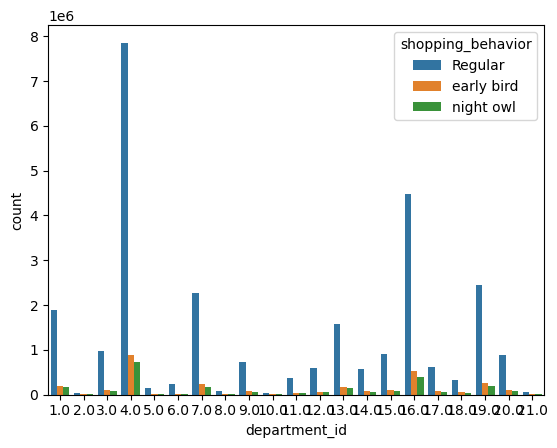

In [33]:
# create clustered bar graph for shopping behavior and department
dep_beh_bar = sns.barplot(x='department_id', y='count', hue='shopping_behavior', data=dep_behavior_long )

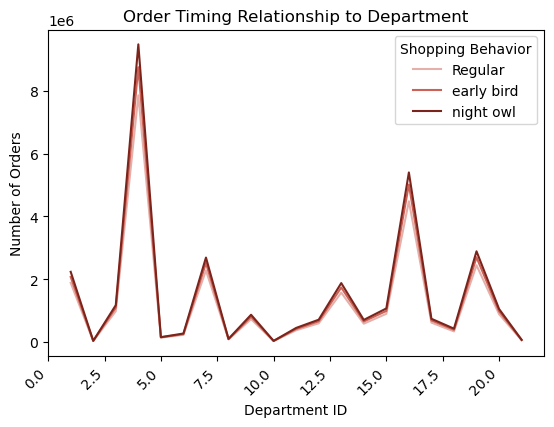

In [113]:
# create stacked line chart for number of orders per department per shopping behavior with color
beh_dep_line = behavior_dep_cross.plot(kind = 'line', stacked = True, color = ['#E6B0AA', '#CD6155', '#7B241C'])

# adjust plot size
plt.subplots_adjust(bottom=0.2)

# add axis and title labels
plt.title('Order Timing Relationship to Department')
plt.xlabel('Department ID')
plt.ylabel('Number of Orders')


# add x tick mark labels, position adjusted
plt.xticks(rotation=45, ha='right')


# add legend title
plt.legend(title='Shopping Behavior')

# save figure
plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\behavior_dep_bar.png')


### Analyze customer shopping behavior by region

In [34]:
# create crosstable with shopping behavior, region, and department
behavior_reg_dep_cross = pd.crosstab(index=[ord_prod_full['Region'], ord_prod_full['shopping_behavior']],
                                        columns=ord_prod_full['department_id'],
                                        dropna=False)

In [35]:
# view crosstable
behavior_reg_dep_cross

department_id                  1.0    2.0     3.0      4.0    5.0    6.0   \
Region    shopping_behavior                                                 
Midwest   Regular            441578   7050  229102  1848724  32988  53813   
          early bird          43526    757   25942   206995   1951   5119   
          night owl           38992    613   18825   172218   1247   4804   
Northeast Regular            329512   5566  174445  1377380  24108  39686   
          early bird          32070    567   19912   156973   1413   3811   
          night owl           29336    452   14242   131486   1021   3394   
South     Regular            629117  10275  325170  2615033  46719  74947   
          early bird          64185   1043   37631   302465   2885   7374   
          night owl           54598    894   26014   243053   2020   6821   
West      Regular            483302   7664  253221  2014966  35775  58790   
          early bird          47688    787   28122   227106   2102   5632   
          night owl           40839    623   19802   182892   1467   5062   

department_id                  7.0    8.0     9.0   10.0  ...    12.0    13.0  \
Region    shopping_behavior                               ...                   
Midwest   Regular            529984  18868  171126  6802  ...  139531  370650   
          early bird          55226   1787   17558   747  ...   14757   38216   
          night owl           40364   1700   15085   644  ...   11841   33235   
Northeast Regular            407659  15712  127160  4765  ...  104254  276399   
          early bird          43529   1765   13306   571  ...   11302   28181   
          night owl           32230   1124   11350   466  ...    9064   24865   
South     Regular            760558  26882  240720  9604  ...  197113  520422   
          early bird          80897   2575   25668  1050  ...   21845   54928   
          night owl           57485   1812   21056   879  ...   16794   47086   
West      Regular            578137  21643  187927  7557  ...  153384  404292   
          early bird          59751   2165   19339   764  ...   16510   41580   
          night owl           42303   1683   16332   724  ...   12532   35515   

department_id                  14.0    15.0     16.0    17.0    18.0    19.0  \
Region    shopping_behavior                                                    
Midwest   Regular            135444  210685  1049484  147020   78518  570480   
          early bird          16407   21294   123708   16297   11729   59088   
          night owl           11700   18723    91031   12507    8736   44147   
Northeast Regular            101629  156724   789129  110018   59291  434753   
          early bird          13180   16170    95697   12383    9489   45231   
          night owl            8765   13861    69200    9084    6359   34691   
South     Regular            194316  299201  1491682  203051  113406  809103   
          early bird          23332   30803   177657   22988   17865   84209   
          night owl           16603   26011   127630   17031   12383   64034   
West      Regular            150550  231251  1151413  156995   84989  629934   
          early bird          18304   23397   134496   17979   12496   64301   
          night owl           12803   19938    97620   13313    8541   47579   

department_id                  20.0   21.0  
Region    shopping_behavior                 
Midwest   Regular            206985  13744  
          early bird          21329   1496  
          night owl           17364   1295  
Northeast Regular            157123  10292  
          early bird          16371   1093  
          night owl           13323    989  
South     Regular            294209  19314  
          early bird          31075   2093  
          night owl           24135   1786  
West      Regular            227483  14259  
          early bird          23231   1463  
          night owl           18621   1321  

[12 rows x 21 columns]

In [36]:
# create a crosstable with shopping behavior and region
reg_behavior_cross = pd.crosstab(ord_prod_full['Region'], ord_prod_full['shopping_behavior'])

In [37]:
# view crosstable
reg_behavior_cross

shopping_behavior,Regular,early bird,night owl
Region,,,
Midwest,6356548,694274,553194
Northeast,4776354,530845,421245
South,9014761,1007355,779866
West,6954073,758328,588216


In [38]:
# create long table for clustered bar graph
reg_behavior_long = reg_behavior_cross.reset_index().melt(id_vars='Region', var_name='shopping_behavior', value_name='count')

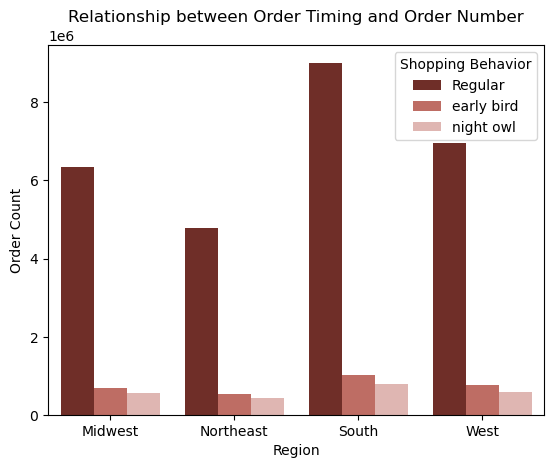

In [115]:
# create clustered bar graph for region and shopping behavior
reg_beh_bar = sns.barplot(x='Region', y='count', hue='shopping_behavior', data=reg_behavior_long, palette = ['#7B241C', '#CD6155', '#E6B0AA'])


# add axis, title, and legend labels
plt.xlabel('Region')
plt.ylabel('Order Count')
plt.title('Relationship between Order Timing and Order Number')
plt.legend(title = 'Shopping Behavior')

# save figure
plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\behavior_region_bar.png')


## Analyze Customer Lifestyle

### Create a customer lifestyle flag based on income and marital status

In [40]:
# find statistics for customer incomes
ord_prod_full['income'].describe()

count    3.243506e+07
mean     9.943550e+04
std      4.305540e+04
min      2.590300e+04
25%      6.700200e+04
50%      9.661200e+04
75%      1.279080e+05
max      5.939010e+05
Name: income, dtype: float64

In [41]:
# set the lifestyle flag for single, low-income
# low-income at or below 30k
# making the assumption that those living with parents and siblings are single
ord_prod_full.loc[(ord_prod_full['fam_status'].isin(['single', 'divorced/widowed', 'living with parents and siblings'])) & (ord_prod_full['income'] <= 30000), 'lifestyle'] = 'single, low-income'


In [42]:
# set the lifestyle flag for single, middle-income
# middle-income set between 30k and 80k
ord_prod_full.loc[(ord_prod_full['fam_status'].isin(['single', 'divorced/widowed', 'living with parents and siblings'])) & (ord_prod_full['income'] > 30000) & (ord_prod_full['income'] <= 80000), 'lifestyle'] = 'single, middle-income'

In [43]:
# set the lifestyle flag for single, high-income
# high-income set above 80k
ord_prod_full.loc[(ord_prod_full['fam_status'].isin(['single', 'divorced/widowed', 'living with parents and siblings'])) & (ord_prod_full['income'] > 80000), 'lifestyle'] = 'single, high-income'

In [44]:
# set the lifestyle flag for married, low-income
# low-income at or below 60k
ord_prod_full.loc[(ord_prod_full['fam_status'] == 'married') & (ord_prod_full['income'] <= 60000), 'lifestyle'] = 'married, low-income'

In [45]:
# set the lifestyle flag for married, middle-income
# middle-income set between 60k and 160k
ord_prod_full.loc[(ord_prod_full['fam_status'] == 'married') & (ord_prod_full['income'] > 60000) & (ord_prod_full['income'] <= 160000), 'lifestyle'] = 'married, middle-income'


In [46]:
# set the lifestyle flag for married, high-income
# high-income set above 160k
ord_prod_full.loc[(ord_prod_full['fam_status'] == 'married') & (ord_prod_full['income'] > 160000), 'lifestyle'] = 'married, high-income'


In [47]:
# find value counts for lifestyle flag to check complete assignment
ord_prod_full['lifestyle'].value_counts(dropna = False)

lifestyle
married, middle-income    17003043
single, high-income        5711203
married, low-income        4141394
single, middle-income      3869614
married, high-income       1633062
single, low-income           76743
Name: count, dtype: int64

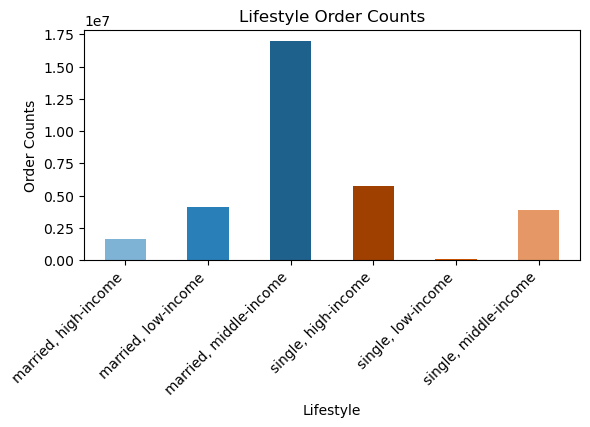

In [120]:
# create bar graph for lifestyle flag
lifestyle_bar = ord_prod_full['lifestyle'].value_counts().sort_index().plot.bar(color = ['#7FB3D5', '#2980B9', '#1F618D', '#A04000', '#D35400', '#E59866'])

# adjust plot size
plt.subplots_adjust(bottom=0.4)

# add axis, title labels
plt.xlabel('Lifestyle')
plt.ylabel('Order Counts')
plt.title('Lifestyle Order Counts')

# add x tick labels, position adjusted
plt.xticks(rotation=45, ha='right')

# save figure
plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\lifestyle_order_bar.png')


### Find statistics for lifestyle based on order number

In [49]:
# calculate statistics for lifestyle flag
lifestyle_order_stats = ord_prod_full.groupby('lifestyle')['order_number'].agg(['min', 'max', 'mean'])

In [50]:
# view table
lifestyle_order_stats

,min,max,mean
lifestyle,,,
"married, high-income",1,99,17.649773
"married, low-income",1,99,16.380740
"married, middle-income",1,99,17.205960
"single, high-income",1,99,17.395376
"single, low-income",1,99,14.430385
"single, middle-income",1,99,17.140757


### Find statistics for shopping behavior based on expenditure

In [51]:
# find the expenditure for each customer for each order
lifestyle_order_totals = ord_prod_full.groupby(['lifestyle', 'user_id', 'order_number'])['prices'].sum().reset_index()

In [52]:
# view the order expenditures
lifestyle_order_totals

,lifestyle,user_id,order_number,prices
0,"married, high-income",54,1,94.9
1,"married, high-income",54,2,120.7
2,"married, high-income",54,3,99.9
3,"married, high-income",54,4,47.1
4,"married, high-income",54,5,28.2
...,...,...,...,...
3214869,"single, middle-income",206193,37,124.6
3214870,"single, middle-income",206193,38,153.3
3214871,"single, middle-income",206193,39,55.1
3214872,"single, middle-income",206193,40,120.0


In [53]:
# find the expenditure statistics for each customer 
lifestyle_shopper_total = lifestyle_order_totals.groupby(['lifestyle', 'user_id'])['prices'].agg(['min', 'max', 'mean']).reset_index()

In [54]:
# view the expenditure statistics for each customer
lifestyle_shopper_total

,lifestyle,user_id,min,max,mean
0,"married, high-income",54,5.8,189.5,69.085714
1,"married, high-income",61,84.2,225.2,155.025000
2,"married, high-income",110,69.0,202.5,129.000000
3,"married, high-income",175,7.4,131.1,40.839130
4,"married, high-income",190,16.2,235.3,83.976471
...,...,...,...,...,...
206204,"single, middle-income",206175,45.9,96.0,72.416667
206205,"single, middle-income",206185,13.2,101.2,58.550000
206206,"single, middle-income",206186,77.6,111.0,91.400000
206207,"single, middle-income",206188,2.6,92.4,59.957143


In [89]:
# find the expenditure statistics for each flag
lifestyle_price_stats = lifestyle_shopper_total.groupby('lifestyle').agg({'min': 'min', 'max': 'max', 'mean': 'mean'}).reset_index()

In [90]:
lifestyle_price_stats

,lifestyle,min,max,mean
0,"married, high-income",0.0,1047.4,85.576077
1,"married, low-income",0.0,842.1,56.829345
2,"married, middle-income",0.0,1092.2,84.130960
3,"single, high-income",0.0,736.7,83.816557
4,"single, low-income",1.0,712.0,47.127179
5,"single, middle-income",0.0,875.0,70.141824


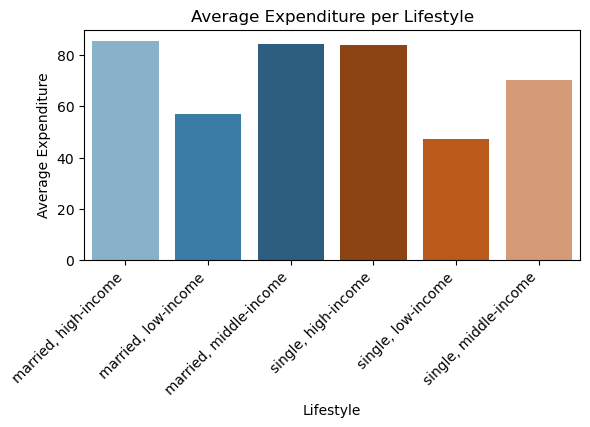

In [122]:
# create bar graph for average order expenditure per lifetstyle
lifestyle_price_bar = sns.barplot(x = 'lifestyle', y = 'mean', data = lifestyle_price_stats, palette = ['#7FB3D5', '#2980B9', '#1F618D', '#A04000', '#D35400', '#E59866'])

# adjust plot size
plt.subplots_adjust(bottom=0.4)

# add axis labels
plt.xlabel('Lifestyle')
plt.ylabel('Average Expenditure')
plt.title('Average Expenditure per Lifestyle')

# add x tick labels, position adjusted
plt.xticks(rotation = 45, ha = 'right')

# save figure
plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\lifestyle_spend_bar.png')


In [ ]:
lifest

### Analyze customer shopping behavior by region

In [57]:
# create crosstable for lifestyle and region
lifestyle_reg_cross = pd.crosstab(ord_prod_full['Region'], ord_prod_full['lifestyle'], dropna = False)

In [58]:
# view crosstable
lifestyle_reg_cross

lifestyle,"married, high-income","married, low-income","married, middle-income","single, high-income","single, low-income","single, middle-income"
Region,,,,,,
Midwest,392611,966271,3971339,1362512,20684,890599
Northeast,293770,726041,3020429,994034,11318,682852
South,538656,1402058,5626873,1895312,25334,1313749
West,408025,1047024,4384402,1459345,19407,982414


In [59]:
# create long table for clustered bar graph
reg_lifestyle_long = lifestyle_reg_cross.reset_index().melt(id_vars='Region', var_name='lifestyle', value_name='count')


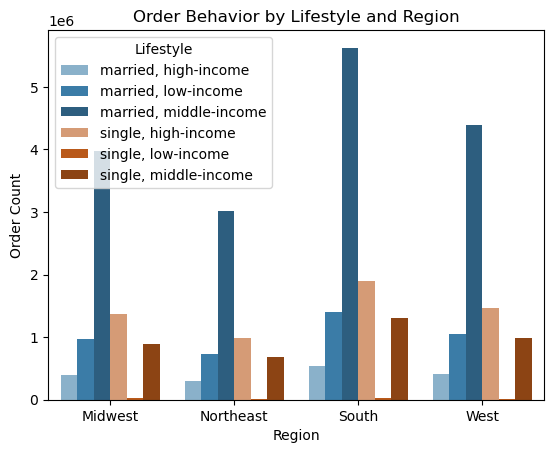

In [123]:
# create clustered bar graph for region and lifestyle
reg_life_bar = sns.barplot(x='Region', y='count', hue='lifestyle', data=reg_lifestyle_long, palette = ['#7FB3D5', '#2980B9', '#1F618D', '#E59866', '#D35400', '#A04000'])

# add axis, legend and title lables
plt.xlabel('Region')
plt.ylabel('Order Count')
plt.title('Order Behavior by Lifestyle and Region')
plt.legend(title = 'Lifestyle')

# save figure
plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\lifestyle_region_bar.png')


## Export tables and plots

In [80]:
shopping_behavior_bar.figure.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\Visualizations\shopping_behavior_bar.png')

In [81]:
dep_beh_bar.figure.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\Visualizations\department_behavior_bar.png')

In [82]:
reg_beh_bar.figure.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\Visualizations\region_behavior_bar.png')

In [84]:
lifestyle_bar.figure.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\Visualizations\lifestyle_bar.png')

In [85]:
reg_life_bar.figure.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\Visualizations\region_lifestyle_bar.png')

In [61]:
ord_prod_full.to_pickle(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\Data\Prepared Data\ord_prod_full.pkl')

In [62]:
ord_prod_full['prices'].max()

25.0

In [125]:
behavior_table = ord_prod_full['shopping_behavior'].value_counts()

In [126]:
behavior_table.to_clipboard()

In [127]:
lifestyle_table = ord_prod_full['lifestyle'].value_counts()

In [128]:
lifestyle_table.to_clipboard()

In [130]:
price_range_table = ord_prod_full['price_range_loc'].value_counts()

In [131]:
price_range_table.to_clipboard()

In [132]:
busiest_table = ord_prod_full['Busiest_Days'].value_counts()

In [133]:
busiest_table.to_clipboard()

In [134]:
busiest_period_table = ord_prod_full['busiest_period_of_day'].value_counts()

In [136]:
busiest_period_table.to_clipboard()

In [137]:
loyalty_table = ord_prod_full['loyalty_flag'].value_counts()

In [138]:
loyalty_table.to_clipboard()

In [139]:
spending_table = ord_prod_full['spending_flag'].value_counts()

In [140]:
spending_table.to_clipboard()

In [141]:
frequency_table = ord_prod_full['frequency_flag'].value_counts()

In [142]:
frequency_table.to_clipboard()